In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D9511B908>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D9A15D7B8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D9A15D860>)


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Define Session
sess = tf.InteractiveSession()
#Define Placeholders for inputs
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
#Define Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
#Init variables
sess.run(tf.global_variables_initializer())

In [10]:
accuracy_log = []

#define outputs
y = tf.matmul(x,W) + b
#Define NN model
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
#Learning rate here
#Constant (known 0.5)
#Decaying
#Piecewise
alpha = np.random.uniform(low=0.0, high=1.0)
train_step = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
    #Evaluate Model

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    temp_acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    accuracy_log.append(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print('Step '+str(_)+'   Accuracy '+str(temp_acc))
    #Learning rate here
print('complete')

Step 0   Accuracy 0.3595
Step 1   Accuracy 0.2612
Step 2   Accuracy 0.5731
Step 3   Accuracy 0.444
Step 4   Accuracy 0.5469
Step 5   Accuracy 0.5103
Step 6   Accuracy 0.6112
Step 7   Accuracy 0.5412
Step 8   Accuracy 0.5934
Step 9   Accuracy 0.626
Step 10   Accuracy 0.7323
Step 11   Accuracy 0.7865
Step 12   Accuracy 0.8103
Step 13   Accuracy 0.8156
Step 14   Accuracy 0.8454
Step 15   Accuracy 0.8181
Step 16   Accuracy 0.7704
Step 17   Accuracy 0.6792
Step 18   Accuracy 0.6193
Step 19   Accuracy 0.722
Step 20   Accuracy 0.7767
Step 21   Accuracy 0.8236
Step 22   Accuracy 0.808
Step 23   Accuracy 0.778
Step 24   Accuracy 0.7751
Step 25   Accuracy 0.7767
Step 26   Accuracy 0.7223
Step 27   Accuracy 0.8295
Step 28   Accuracy 0.8445
Step 29   Accuracy 0.8386
Step 30   Accuracy 0.8445
Step 31   Accuracy 0.8661
Step 32   Accuracy 0.8728
Step 33   Accuracy 0.8693
Step 34   Accuracy 0.867
Step 35   Accuracy 0.8577
Step 36   Accuracy 0.8281
Step 37   Accuracy 0.8194
Step 38   Accuracy 0.871
Ste

In [24]:
print(accuracy_log[10:50])

[0.91829997, 0.9192, 0.92110002, 0.92229998, 0.92290002, 0.92259997, 0.92199999, 0.92199999, 0.92189997, 0.92079997, 0.92220002, 0.92320001, 0.92159998, 0.92559999, 0.92360002, 0.9242, 0.92379999, 0.92189997, 0.92309999, 0.92290002, 0.92449999, 0.92210001, 0.92309999, 0.92180002, 0.921, 0.9228, 0.92449999, 0.92309999, 0.92180002, 0.91850001, 0.9224, 0.9188, 0.92140001, 0.92110002, 0.91979998, 0.92049998, 0.92079997, 0.92150003, 0.92019999, 0.92189997]


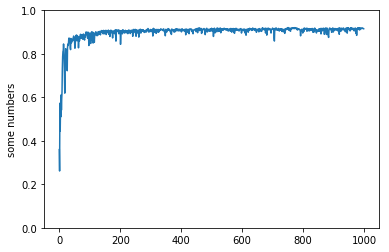

In [11]:
plt.plot(accuracy_log)
plt.ylabel('some numbers')
plt.ylim(0,1)
plt.show()